# PIV data from algae PIV 
See the google shared drive Algae Lab/PIV_29112020 for the data
https://drive.google.com/drive/folders/1QTjefUV0BZpM-ev0civBPu_iyD2aS5Va?usp=sharing

See e-mail from Hadar for the set of results:
 - rms
 - Reynolds stress 
 - turbulence intensity "near" and "far" from the algae for all frequencies.

In [1]:
from pivpy import io, pivpy, graphics
import xarray as xr
import os
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def remove_outliers(d):
    upperu = np.percentile(np.abs(d.u.values.flatten()),97.5)
    upperv = np.percentile(np.abs(d.v.values.flatten()),97.5)

    masku = d['u'].where(np.abs(d['u']) <= upperu)
    masku.fillna(0.)
    d['u'] = masku

    maskv = d['v'].where(np.abs(d['v']) <= upperv)
    maskv.fillna(0.)
    d['v'] = maskv
    return d


In [3]:
# %pdb
folders = ['150','200','250','280','300']
data = []
for f in folders:
    d = io.load_directory(f'Analysis/{f}/')
    # crop the analyzed region, see some images
    d = d.piv.crop([500,3800,2600,250])
    d = remove_outliers(d)
    d.attrs['folder'] = f
    data.append(d)

found 77 files
found 100 files
found 100 files
found 100 files
found 100 files


In [4]:
def analysis(d):
    print(f"Grid frequency {d.attrs['folder']} rpm")
    fluct = d.copy()
    fluct -= fluct.mean(dim='t')
    fluct['tke'] = fluct['u']**2 + fluct['v']**2
    fluct['rs'] = -1*fluct['u']*fluct['v'] # add mean during the plot
    fluct['ti'] = np.sqrt(fluct['tke'])/d['v'].mean(dim='t')

    plt.figure()
    fluct.rs.mean(dim='t').plot.contourf()
    plt.gca().invert_yaxis()
    plt.title(f'Reynolds stress')

    plt.figure()
    np.sqrt(fluct['tke']).isel(t=0).plot.contourf()
    plt.gca().invert_yaxis()
    plt.title(f'TKE t={d.t[0].values}')

    plt.figure()
    fluct.ti.isel(t=0).plot.contourf()
    plt.gca().invert_yaxis()
    plt.title(f'Turbulent intensity t={d.t[0].values}')

Grid frequency 150 rpm
Grid frequency 200 rpm
Grid frequency 250 rpm
Grid frequency 280 rpm
Grid frequency 300 rpm


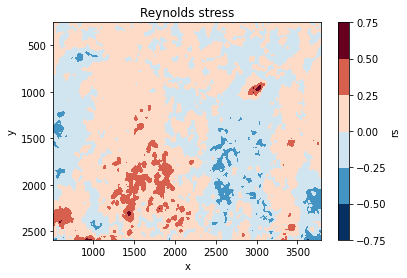

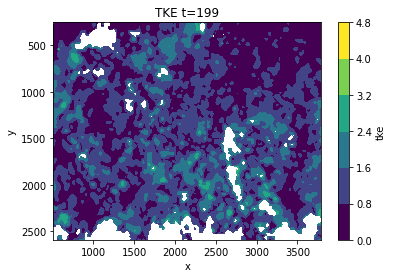

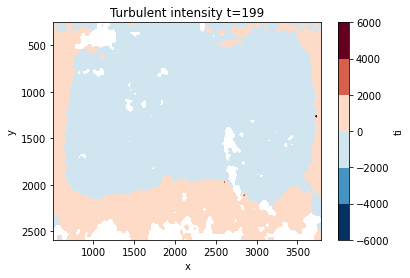

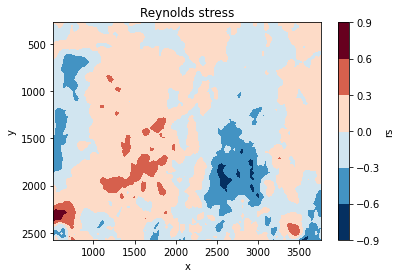

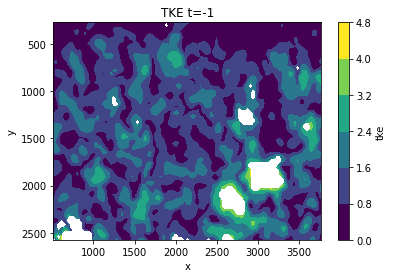

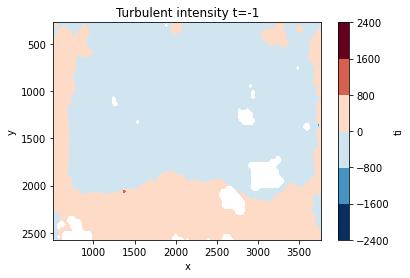

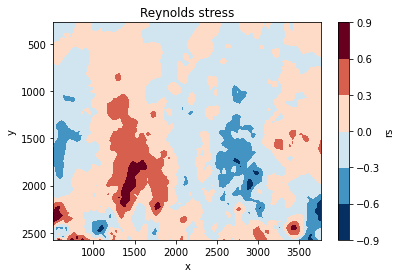

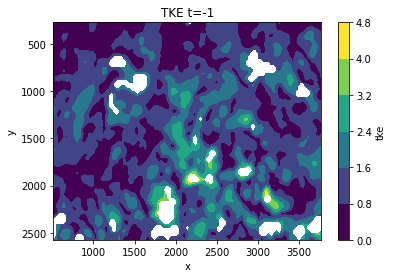

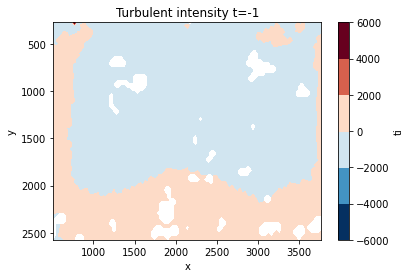

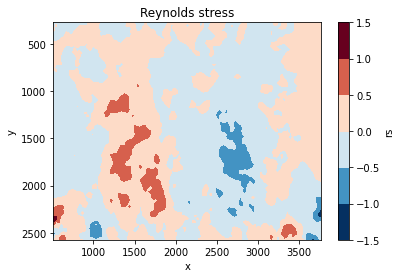

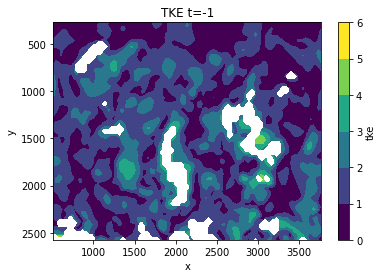

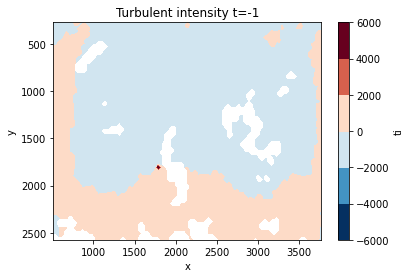

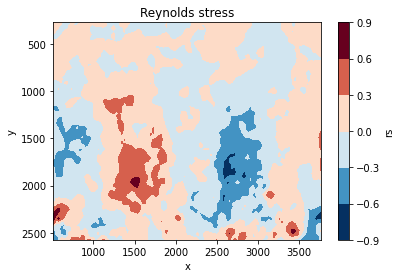

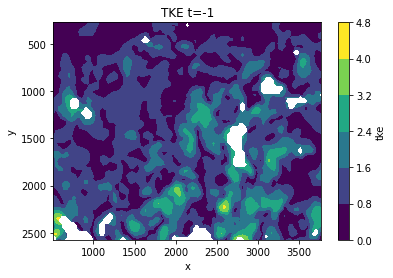

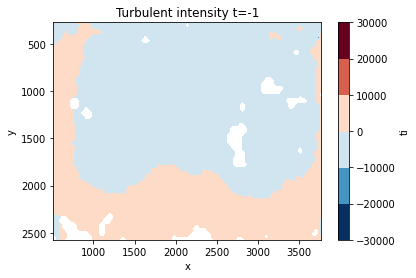

In [5]:
for d in data:
    analysis(d)